# Домашнее задание. Решение конкурса на kaggle.com

Это домашнее задание посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания:

### Отправить ваши предсказания в Stepik.
За прохождение определенных порогов будут начисляться баллы. Эта часть оценивается из 5 баллов.

1) $1.00 \geqslant score \geqslant 0.84$ --- 5 баллов

2) $0.84 > score \geqslant 0.77$ --- 4 балла

3) $0.77 > score \geqslant 0.70$ --- 3 балла

4) $0.70 > score \geqslant 0.65$ --- 2 балла

5) $0.65 > score \geqslant 0.6$ --- 1 балл

6) $0.60 > score$ --- 0 баллов

Для этого мы предварительно разделили данные в задании на две части.
* `train.csv`. На этом наборе данных вам необходимо создать и обучить модель. Подробное описание файла есть в ноутбуке.
* `test.csv`. В каждой строчке файла `test.csv` указаны признаки тестовых объектов. Предсказания для этого набора необходимо записать в файл submission.csv и сдать в соответствующий шаг на Stepik. Количество попыток ограничено 100 штук.

Отправлять в Stepik вы будете файл с ответами `my_submission.csv`. В этом файле вам необходимо для каждого объекта из датасета предсказать вероятность класса 1. Мы подготовили для вас файл с примером посылки `submission.csv`. Ваш файл должен быть оформлен таким же образом. В ноутбуке есть пример оформления файла посылки. Для отправки файла с предсказаниями на Stepik есть отдельный шаг.

### Сделать полноценный отчет о вашей работе.
Опишите, как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов. В этом пункте вам необходимо отправить файл в формате .ipynb на Stepik --- для этого в домашнем задании есть отдельный шаг. Этот пункт оценивается из 10 баллов.

**Вторая часть будет проверяться в формате peer-review. Т.е. вашу посылку на Stepik будут проверять 3 других студента, и медианное значение их оценок будет выставлено. Чтобы получить баллы, вам также нужно будет проверить трех других учеников. Это станет доступно после того, как вы сдадите задание сами.**

### Контест на Kaggle
Для вашего удобства мы подготовили [контест на Kaggle](https://www.kaggle.com/c/advanced-dls-spring-2021/). Тестирующая система на Kaggle выдает те же баллы, что и Stepik. Мы рекомендуем в качестве основной тестирующей системы использовать именно Kaggle, а затем сдать лучшую посылку на Stepik. Так вы привыкните работать с Kaggle.

Проблема для российских пользователей Kaggle заключается в том, что подтверждение аккаунта по номеру телефона работает с перебоями или не работает вообще. Без подтвержденного номера телефона вы не сможете совершать посылки в kaggle. Если у вас возникла такая проблема, мы советуем следующие шаги:
* Попробовать зарегистрировать аккаунт с аутентификацией через gmail. В таком случае, аккаунт должен работать без подтверждения номера телефона.
* Если у вас есть не российский номер, используйте его для верификации аккаунта.
* Если на номер телефона не приходит смс для верификации аккаунта, обратитесь в службу поддержки kaggle. Они с переменным успехом умеют подтверждать аккаунты вручную.
* Если все же подтвердить аккаунт и получить доступ к сдаче заданий не удалось, используйте только сдачу в Stepik.

### Несколько замечаний по выполнению работы
* Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое --- дерзайте!
* Пожалуйста, перед сдачей ноутбука убедитесь, что работа чистая и понятная. Это значительно облегчит проверку и повысит ваши ожидаемые баллы.
* Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме.


Данные: [train.csv](https://drive.google.com/file/d/1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K/view?usp=share_link),
[test.csv](https://drive.google.com/file/d/1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r/view?usp=share_link), [submission.csv](https://drive.google.com/file/d/199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y/view?usp=share_link).

Если ссылки на данные не работают, их можно скачать [на Kaggle](https://www.kaggle.com/competitions/advanced-dls-spring-2021/data).

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендации снижайте 1 балл.

**Если решение верное, но не удовлетворяет вашим эстетическим предпочтениям, за это баллы снижать не нужно.**

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить, используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [1]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки.

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [3]:
!gdown 1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K  # train.csv
!gdown 1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r  # test.csv
!gdown 199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y  # submission.csv

Downloading...
From: https://drive.google.com/uc?id=1ERwQ5odiK1Zvi1LtjpkzCMUswYsAX8_K
To: /content/train.csv
100% 664k/664k [00:00<00:00, 16.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=1fGw_-RFwvn_LEdt91Jq-7A-wzG6mmH8r
To: /content/test.csv
100% 218k/218k [00:00<00:00, 68.6MB/s]
Downloading...
From: https://drive.google.com/uc?id=199Mt4OYZNaelT83U-HGDsEYs2YcUGQ6y
To: /content/submission.csv
100% 14.7k/14.7k [00:00<00:00, 37.7MB/s]


In [4]:
data = pd.read_csv('./train.csv', decimal=',' )
data2 = pd.read_csv('./test.csv', decimal=',' )
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.5,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.9,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.3,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [5]:
data.info() #нан значений нет, то есть ничего не заменяем и не дропаем

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5282 entries, 0 to 5281
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ClientPeriod              5282 non-null   int64 
 1   MonthlySpending           5282 non-null   object
 2   TotalSpent                5282 non-null   object
 3   Sex                       5282 non-null   object
 4   IsSeniorCitizen           5282 non-null   int64 
 5   HasPartner                5282 non-null   object
 6   HasChild                  5282 non-null   object
 7   HasPhoneService           5282 non-null   object
 8   HasMultiplePhoneNumbers   5282 non-null   object
 9   HasInternetService        5282 non-null   object
 10  HasOnlineSecurityService  5282 non-null   object
 11  HasOnlineBackup           5282 non-null   object
 12  HasDeviceProtection       5282 non-null   object
 13  HasTechSupportAccess      5282 non-null   object
 14  HasOnlineTV             

In [6]:
pd.DataFrame([data.isna().sum()])

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
for i in range(data.shape[0]):
    if (data.TotalSpent[i]) == " ":
        data.loc[i, "TotalSpent"] = 0
data.TotalSpent = data.TotalSpent.astype(np.float64)
data.TotalSpent

,TotalSpent
0,1026.35
1,1872.20
2,75.90
3,2570.00
4,6758.45
...,...
5277,82.15
5278,2188.45
5279,55.05
5280,2215.25


In [19]:
for i in range(data2.shape[0]):
    if (data2.TotalSpent[i]) == " ":
        data2.loc[i, "TotalSpent"] = 0
data2.TotalSpent = data2.TotalSpent.astype(np.float64)
data2.TotalSpent

,TotalSpent
0,2386.85
1,3004.15
2,684.85
3,4868.40
4,1389.60
...,...
1756,7555.00
1757,272.35
1758,171.45
1759,1620.80


In [20]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [21]:
numeric_data = data[num_cols]

categorial_data = data[cat_cols]
categorial_data.head()

numeric_data2 = data2[num_cols]
categorial_data2 = data2[cat_cols]

In [22]:
y  = data[target_col]

Анализ данных (3 балла)
1) Для численных призанков постройте гистограмму (plt.hist(...)) или boxplot (plt.boxplot(...)). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать data.value_counts() и построить bar диаграммы plt.bar(...) или круговые диаграммы plt.pie(...) (хорошо, елси вы сможете это сделать на одном гарфике с помощью plt.subplots(...)).
2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.
3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - sns, pandas_visual_analysis, etc.
Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

работаем с численными признаками

num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

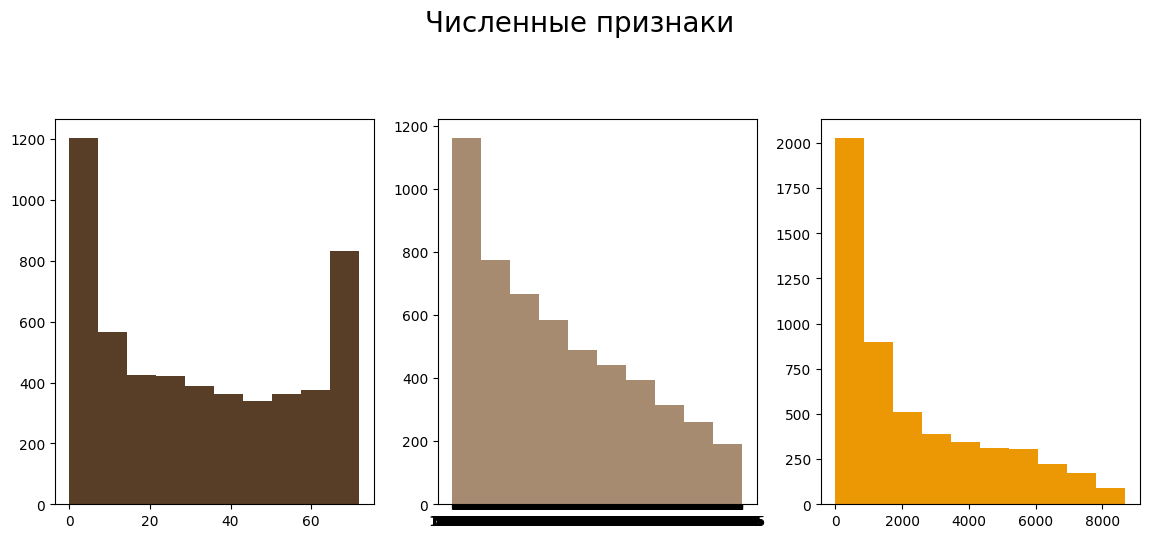

In [23]:
fig, ax = plt.subplots(1,3,figsize=(14,5))

ax[0].hist(data.ClientPeriod, color="#583E26")
ax[1].hist(data.MonthlySpending, color="#A78B71")
ax[2].hist(data.TotalSpent, color="#EC9704")

plt.suptitle('Численные признаки',y = 1.1,fontsize=20)
plt.show()
#выод: потом нужно будет попробовать нормализовать

работаем с категориальными

cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

In [24]:
for i in range(len(cat_cols)):
    print(i, data[cat_cols[i]].value_counts())
    print()

0 Sex
Male      2655
Female    2627
Name: count, dtype: int64

1 IsSeniorCitizen
0    4440
1     842
Name: count, dtype: int64

2 HasPartner
No     2705
Yes    2577
Name: count, dtype: int64

3 HasChild
No     3676
Yes    1606
Name: count, dtype: int64

4 HasPhoneService
Yes    4761
No      521
Name: count, dtype: int64

5 HasMultiplePhoneNumbers
No                  2511
Yes                 2250
No phone service     521
Name: count, dtype: int64

6 HasInternetService
Fiber optic    2341
DSL            1800
No             1141
Name: count, dtype: int64

7 HasOnlineSecurityService
No                     2612
Yes                    1529
No internet service    1141
Name: count, dtype: int64

8 HasOnlineBackup
No                     2332
Yes                    1809
No internet service    1141
Name: count, dtype: int64

9 HasDeviceProtection
No                     2317
Yes                    1824
No internet service    1141
Name: count, dtype: int64

10 HasTechSupportAccess
No               

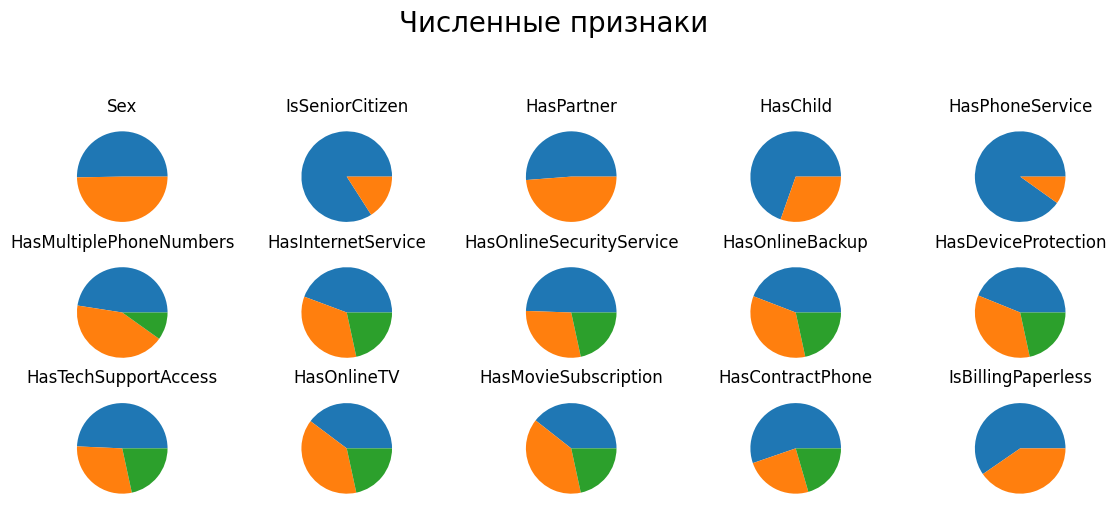

In [25]:
fig, ax = plt.subplots(3,5,figsize=(14,5))

for i in range(3):
    for j in range(5):
        if i == 0:
            ax[i, j].pie(data[cat_cols[j]].value_counts())
            ax[i,j].set(title = cat_cols[j])
        if i == 1:
            ax[i, j].pie(data[cat_cols[5+j]].value_counts())
            ax[i,j].set(title = cat_cols[5+j])
        if i == 2:
            ax[i, j].pie(data[cat_cols[10+j]].value_counts())
            ax[i,j].set(title = cat_cols[10+j])

plt.suptitle('Численные признаки',y = 1.1,fontsize=20)
plt.show()

посмотрим распреление целевой переменной

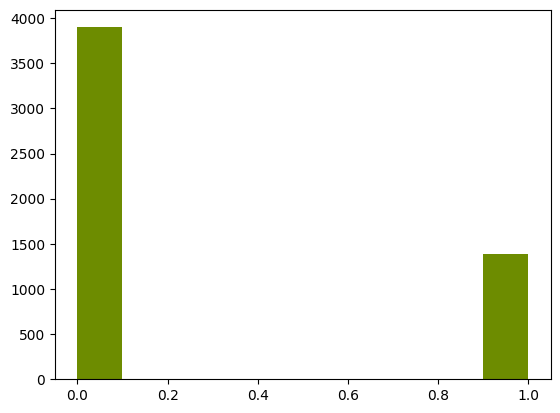

In [26]:
plt.hist(y, color="#6D8C00")
plt.show()
#в целом не так сильно не сбалансирован( но метрику accuracy лучше не использовать)

(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

In [27]:
# YOUR CODE

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а.

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC.

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C).


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [28]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline

In [29]:
# Нормализация числовых признаков
#последний можно не нормализовать тк там показатели примерно в одном диапазоне

In [30]:
scaler = StandardScaler()
scaled_data_1 = scaler.fit_transform(data['ClientPeriod'].values.reshape(-1, 1))
scaled_data_2 = scaler.fit_transform(data['MonthlySpending'].values.reshape(-1, 1))
scaled_data_3 = scaler.fit_transform(data['TotalSpent'].values.reshape(-1, 1))
scaled_data_1

scaled_data_1_2 = scaler.fit_transform(data2['ClientPeriod'].values.reshape(-1, 1))
scaled_data_2_2 = scaler.fit_transform(data2['MonthlySpending'].values.reshape(-1, 1))
scaled_data_3_2 = scaler.fit_transform(data2['TotalSpent'].values.reshape(-1, 1))

In [31]:
scaled_data_1 = pd.DataFrame(scaled_data_1, columns = ["ClientPeriod"])
scaled_data_2 = pd.DataFrame(scaled_data_2, columns = ["MonthlySpending"])
scaled_data_3 = pd.DataFrame(scaled_data_3, columns = ["TotalSpent"])

scaled_data_1_2 = pd.DataFrame(scaled_data_1_2, columns = ["ClientPeriod"])
scaled_data_2_2 = pd.DataFrame(scaled_data_2_2, columns = ["MonthlySpending"])
scaled_data_3_2= pd.DataFrame(scaled_data_3_2, columns = ["TotalSpent"])

(scaled_data_1, scaled_data_2, scaled_data_3)

(      ClientPeriod
 0         0.920767
 1         1.613288
 2        -1.279005
 3        -0.016173
 4         1.124450
 ...            ...
 5277     -1.197532
 5278      0.717084
 5279     -1.279005
 5280     -0.138382
 5281     -0.545747
 
 [5282 rows x 1 columns],
       MonthlySpending
 0           -1.505447
 1           -1.294998
 2            0.363737
 3            0.476418
 4            1.667856
 ...               ...
 5277        -1.144204
 5278        -0.678565
 5279        -0.327265
 5280         0.367051
 5281         0.363737
 
 [5282 rows x 1 columns],
       TotalSpent
 0      -0.555852
 1      -0.183039
 2      -0.974768
 3       0.124519
 4       1.970599
 ...          ...
 5277   -0.972013
 5278   -0.043651
 5279   -0.983957
 5280   -0.031838
 5281   -0.401918
 
 [5282 rows x 1 columns])

In [32]:
numeric_data = pd.concat([scaled_data_1, scaled_data_2, scaled_data_3], axis=1)
numeric_data

numeric_data2 = pd.concat([scaled_data_1_2, scaled_data_2_2, scaled_data_3_2], axis=1)
numeric_data2

#НОРМАЛИЗИРОВАТЬ ТРЕТИЙ СТОЛБЕЦ

,ClientPeriod,MonthlySpending,TotalSpent
0,0.394782,-0.274027,0.057688
1,-0.133958,1.147644,0.330847
2,-0.947404,0.401602,-0.695456
3,1.411590,0.326160,1.155787
4,1.574279,-1.481107,-0.383600
...,...,...,...
1756,1.574279,1.370619,2.344622
1757,-0.784715,-1.455959,-0.877989
1758,-1.232110,0.911258,-0.922638
1759,-0.540681,0.832463,-0.281293


категориальные закодируйте с помощью one-hot-encoding'а.

In [33]:
categorial_data.head()

,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check
1,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic)
2,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check
3,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check
4,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic)


In [34]:
numeric_data = data[num_cols]

numeric_data2 = data2[num_cols]

In [35]:
dummy_features = pd.get_dummies(categorial_data)


In [36]:
dummy_features2 = pd.get_dummies(categorial_data2)

In [37]:
X = pd.concat([numeric_data, dummy_features], axis=1)
X_origin = data.iloc[:, :-1]
X.head()



,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,55,19.5,1026.35,0,False,True,False,True,False,True,...,False,False,True,False,True,False,False,False,False,True
1,72,25.85,1872.20,0,False,True,False,True,True,False,...,False,False,False,True,True,False,False,True,False,False
2,1,75.9,75.90,0,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
3,32,79.3,2570.00,1,True,False,False,True,True,False,...,False,True,False,False,True,False,False,False,False,True
4,60,115.25,6758.45,0,True,False,False,True,False,True,...,True,False,False,True,True,False,False,True,False,False


In [38]:
X2 = pd.concat([numeric_data2, dummy_features2], axis=1)
X2

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Sex_Female,Sex_Male,HasPartner_No,HasPartner_Yes,HasChild_No,HasChild_Yes,...,HasMovieSubscription_Yes,HasContractPhone_Month-to-month,HasContractPhone_One year,HasContractPhone_Two year,IsBillingPaperless_No,IsBillingPaperless_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,42,56.1,2386.85,0,False,True,False,True,True,False,...,False,False,True,False,True,False,False,True,False,False
1,29,98.5,3004.15,1,False,True,False,True,True,False,...,True,True,False,False,False,True,False,False,True,False
2,9,76.25,684.85,0,False,True,True,False,True,False,...,False,True,False,False,False,True,False,False,True,False
3,67,74.0,4868.40,0,True,False,False,True,False,True,...,False,False,False,True,True,False,False,True,False,False
4,71,20.1,1389.60,0,True,False,False,True,False,True,...,False,False,False,True,True,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,71,105.15,7555.00,0,True,False,False,True,True,False,...,True,False,False,True,False,True,True,False,False,False
1757,13,20.85,272.35,0,True,False,False,True,False,True,...,False,False,False,True,True,False,False,False,False,True
1758,2,91.45,171.45,0,False,True,False,True,True,False,...,False,True,False,False,False,True,False,False,True,False
1759,19,89.1,1620.80,0,True,False,False,True,True,False,...,True,True,False,False,False,True,False,False,True,False


In [39]:
X.shape, X_origin.shape

((5282, 45), (5282, 19))

Теперь можно разделить на выборки и подобрать гиперпараметры

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values,
                                                    train_size=0.8,
                                                    random_state=42)

In [41]:
def search_and_draw(X, y, model, param_name, grid, param_scale='ordinary', draw=True):
    parameters = {param_name: grid}

    CV_model = GridSearchCV(estimator=model,
                            param_grid=parameters,
                            cv=5,
                            scoring='f1',
                            n_jobs=-1,
                            verbose=10)
    CV_model.fit(X, y)
    means = CV_model.cv_results_['mean_test_score']
    error = CV_model.cv_results_['std_test_score']

    if draw:
        plt.figure(figsize=(15,8))
        plt.title('choose ' + param_name)


        if (param_scale == 'log'):
            plt.xscale('log')

        plt.plot(grid, means, label='mean values of score', color='red', lw=3)

        plt.fill_between(grid, means - 2 * error, means + 2 * error,
                         color='green', label='filled area between errors', alpha=0.5)
        legend_box = plt.legend(framealpha=1).get_frame()
        legend_box.set_facecolor("white")
        legend_box.set_edgecolor("black")
        plt.xlabel('parameter')
        plt.ylabel('roc_auc')
        plt.show()

    return means, error

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [43]:
models = [KNeighborsClassifier(), DecisionTreeClassifier()]
param_names = ['n_neighbors', 'max_depth']
grids = [np.array(np.linspace(4, 30, 8), dtype='int'), np.arange(1, 30)]
param_scales = ['log', 'ordinary']

Fitting 5 folds for each of 8 candidates, totalling 40 fits


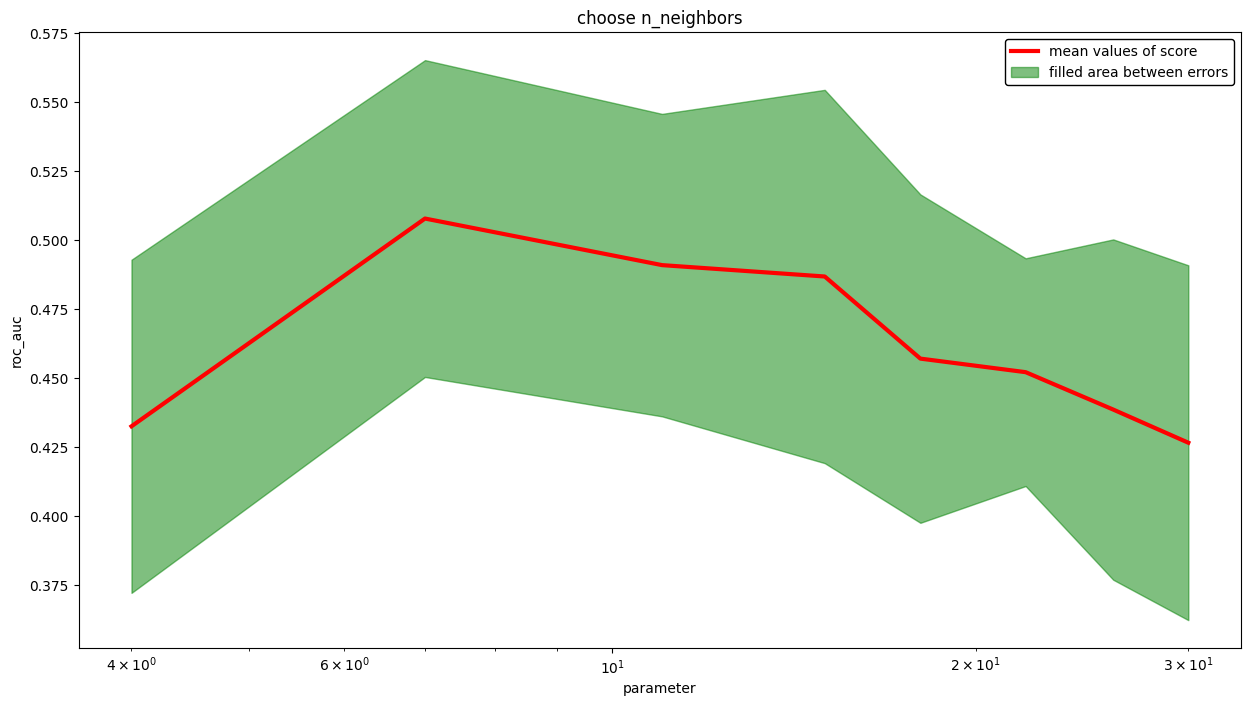

Fitting 5 folds for each of 29 candidates, totalling 145 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


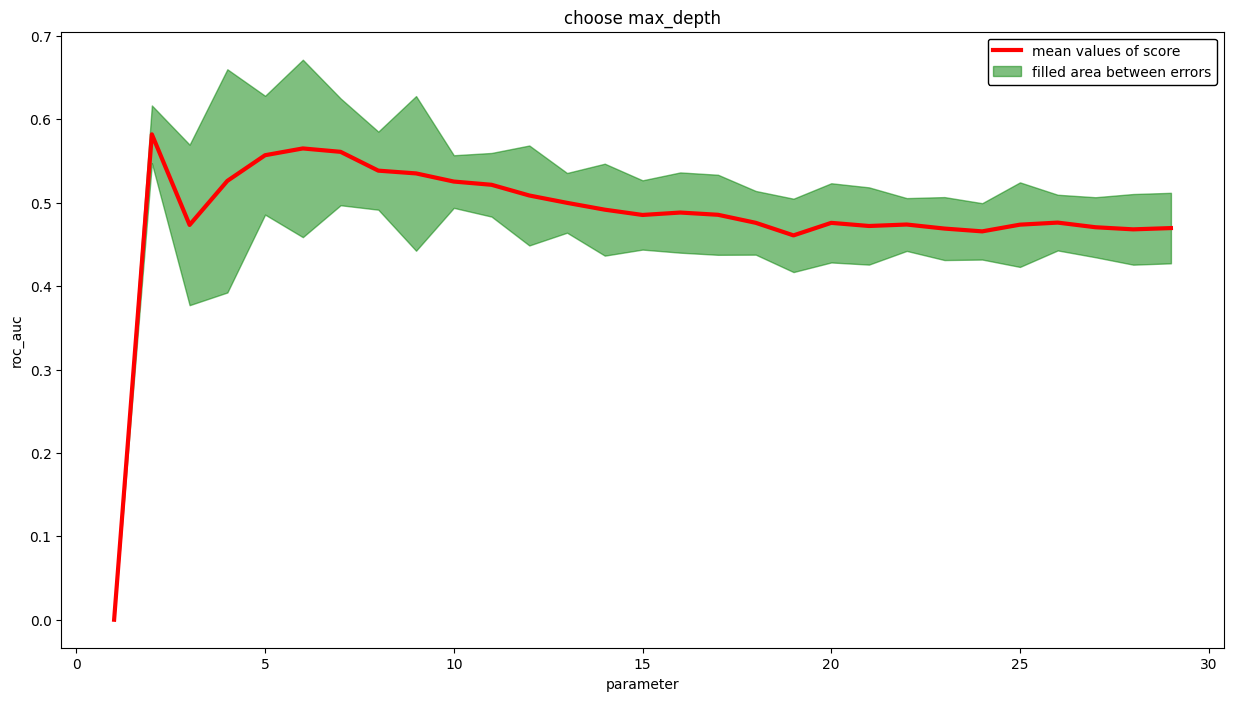

In [44]:
for model, param_name, grid, param_scale in zip(models,
                                                param_names,
                                                grids,
                                                param_scales):
    search_and_draw(X_train, y_train, model, param_name, grid, param_scale)

Теперь случайный лес

In [45]:
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score
from tqdm.notebook import tqdm

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

In [46]:
max_trees = 100

values = np.arange(max_trees) + 1

kf = KFold(n_splits=5, shuffle=True, random_state=1234)

global_scores = []

for train_indices, val_indices in tqdm(kf.split(X_train), total=5):
    scores = []

    X_train_kf = X_train[train_indices]
    y_train_kf = y_train[train_indices]

    X_val_kf = X_train[val_indices]
    y_val_kf = y_train[val_indices]

    forest = RandomForestClassifier(n_estimators=max_trees)
    forest.fit(X_train_kf, y_train_kf)
    trees = forest.estimators_

    for number_of_trees in tqdm(values, leave=False):
        thinned_forest = RandomForestClassifier(n_estimators=number_of_trees)

        thinned_forest.n_classes_ = 2
        thinned_forest.estimators_ = trees[:number_of_trees]

        scores.append(roc_auc_score(y_val_kf, thinned_forest.predict_proba(X_val_kf)[:, 1]))

    scores = np.array(scores)

    global_scores.append(scores)

global_scores = np.stack(global_scores, axis=0)

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

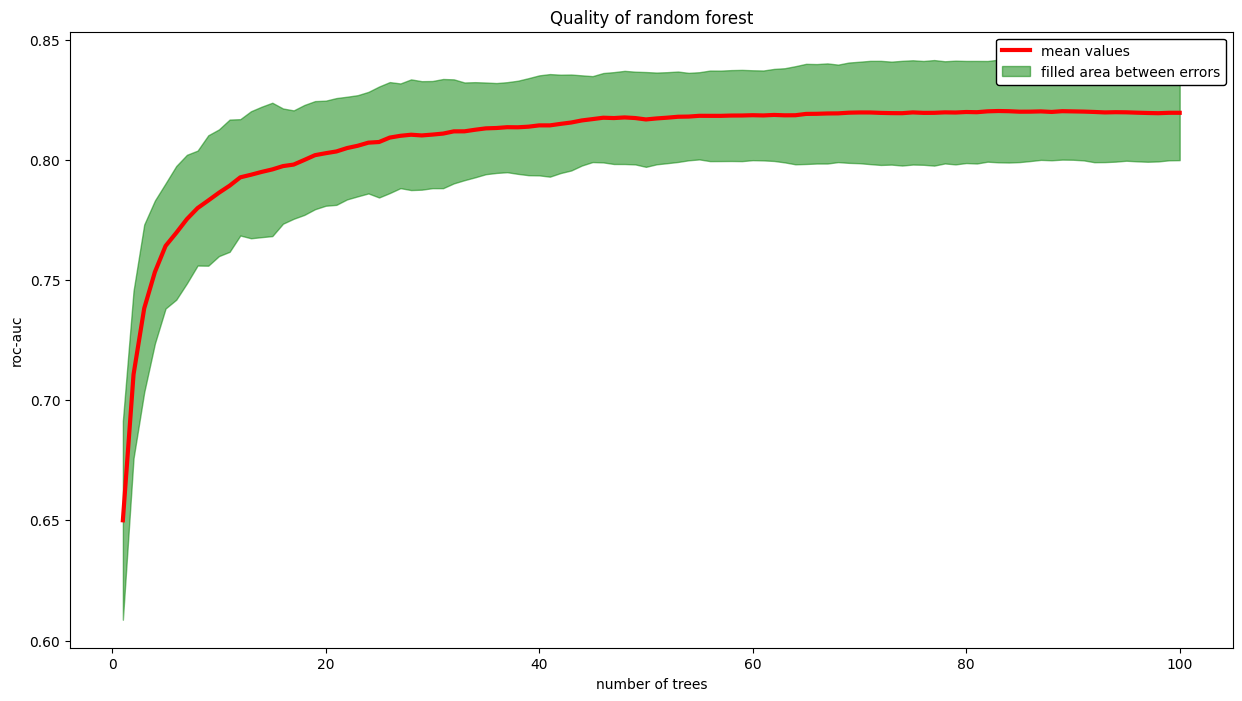

In [48]:
mean_cross_val_score = global_scores.mean(axis=0)
std_cross_val_score = global_scores.std(axis=0)

plt.figure(figsize=(15,8))
plt.title('Quality of random forest')

plt.plot(values, mean_cross_val_score, label='mean values', color='red', lw=3)
plt.fill_between(values,
                 mean_cross_val_score - 2 * std_cross_val_score,
                 mean_cross_val_score + 2 * std_cross_val_score,
                 color='green',
                 label='filled area between errors',
                 alpha=0.5)
legend_box = plt.legend(framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.xlabel('number of trees')
plt.ylabel('roc-auc')

plt.show()

In [49]:
#вывод намного лучше

In [50]:
model = RandomForestClassifier(n_estimators=100, n_jobs=-1)

model.fit(X_train, y_train)
y_train_predicted = model.predict_proba(X_train)[:, 1]
y_test_predicted = model.predict_proba(X_test)[:, 1]

In [51]:
from sklearn.metrics import roc_auc_score, roc_curve

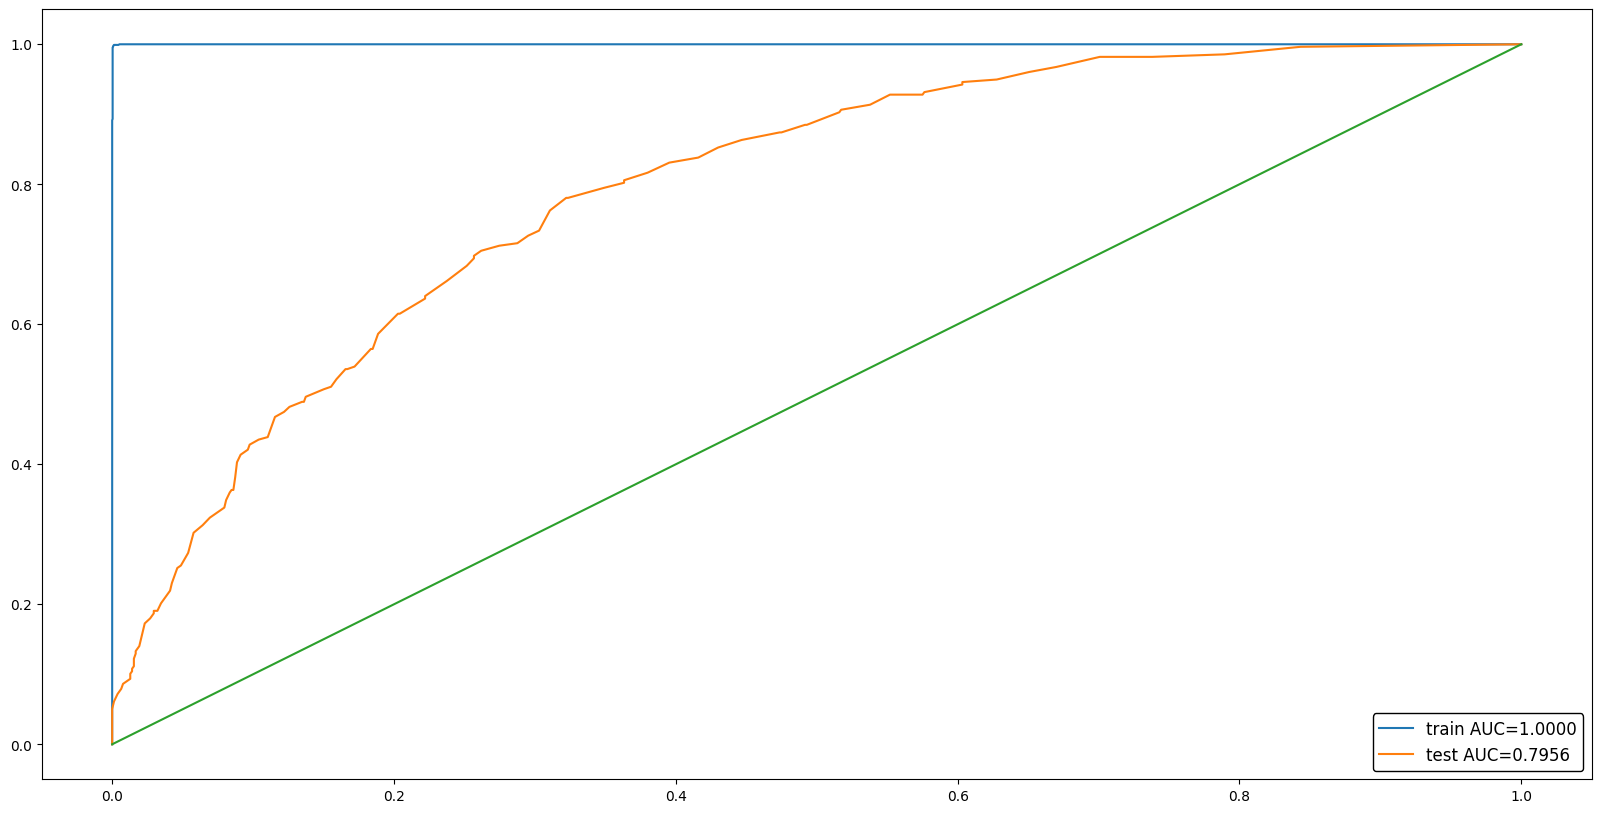

In [52]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(20,10))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с параметрами по умолчанию даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. Catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметров количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию.

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [53]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 7.0 MB/s eta 0:00:00


In [54]:
import catboost

In [55]:
data2

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod
0,42,56.1,2386.85,Male,0,Yes,No,Yes,Yes,DSL,Yes,No,No,No,No,No,One year,No,Credit card (automatic)
1,29,98.5,3004.15,Male,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check
2,9,76.25,684.85,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
3,67,74.0,4868.40,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,Yes,No,Yes,Yes,No,Two year,No,Credit card (automatic)
4,71,20.1,1389.60,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1756,71,105.15,7555.00,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Two year,Yes,Bank transfer (automatic)
1757,13,20.85,272.35,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check
1758,2,91.45,171.45,Male,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,No,Month-to-month,Yes,Electronic check
1759,19,89.1,1620.80,Female,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,Month-to-month,Yes,Electronic check


In [56]:
data

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.5,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.20,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.9,75.90,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.3,2570.00,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5277,3,30.4,82.15,Male,0,No,No,No,No phone service,DSL,No,No,No,Yes,No,No,Month-to-month,No,Electronic check,0
5278,50,44.45,2188.45,Male,0,Yes,No,No,No phone service,DSL,Yes,No,No,Yes,Yes,No,One year,Yes,Bank transfer (automatic),0
5279,1,55.05,55.05,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,No,No,Month-to-month,No,Mailed check,0
5280,29,76.0,2215.25,Female,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Credit card (automatic),0


In [57]:
# CatBoost умеет работать с категориальными признаками сам
X_train_origin, X_test_origin, _, _ = train_test_split(X_origin.values, y.values,
                                                       train_size=0.8,
                                                       random_state=42)

In [58]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200,
                                             cat_features=[i for i in range(3, 19)])

boosting_model.fit(X_train_origin, y_train)

#y_train_predicted = boosting_model.predict_proba(X_train_origin)[:, 1]
#y_test_predicted = boosting_model.predict_proba(X_test_origin)[:, 1]

Learning rate set to 0.083391
0:	learn: 0.6382749	total: 89.6ms	remaining: 17.8s
1:	learn: 0.5970973	total: 137ms	remaining: 13.6s
2:	learn: 0.5610080	total: 180ms	remaining: 11.8s
3:	learn: 0.5329491	total: 212ms	remaining: 10.4s
4:	learn: 0.5112068	total: 260ms	remaining: 10.1s
5:	learn: 0.4930985	total: 319ms	remaining: 10.3s
6:	learn: 0.4800850	total: 356ms	remaining: 9.83s
7:	learn: 0.4681540	total: 389ms	remaining: 9.33s
8:	learn: 0.4583285	total: 417ms	remaining: 8.85s
9:	learn: 0.4494858	total: 449ms	remaining: 8.52s
10:	learn: 0.4439489	total: 473ms	remaining: 8.13s
11:	learn: 0.4371125	total: 509ms	remaining: 7.98s
12:	learn: 0.4311122	total: 547ms	remaining: 7.86s
13:	learn: 0.4264039	total: 573ms	remaining: 7.62s
14:	learn: 0.4222915	total: 609ms	remaining: 7.5s
15:	learn: 0.4190003	total: 681ms	remaining: 7.83s
16:	learn: 0.4153313	total: 722ms	remaining: 7.77s
17:	learn: 0.4132986	total: 760ms	remaining: 7.69s
18:	learn: 0.4116653	total: 787ms	remaining: 7.49s
19:	learn: 

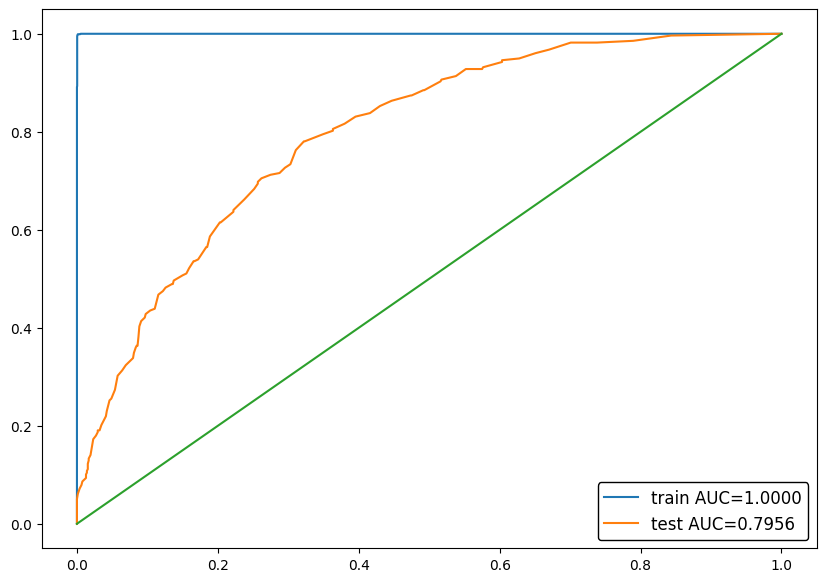

In [59]:
train_auc = roc_auc_score(y_train, y_train_predicted)
test_auc = roc_auc_score(y_test, y_test_predicted)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_predicted)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_predicted)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

In [60]:
boosting_model = catboost.CatBoostClassifier(n_estimators=200, silent=True,
                                             cat_features=[i for i in range(3, 19)],
                                             eval_metric='AUC')
boosting_model.grid_search({'l2_leaf_reg': np.linspace(0, 1, 20)},
                           X_train_origin,
                           y_train, plot=True, refit=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))


bestTest = 0.8361154244
bestIteration = 192

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8361154	best: 0.8361154 (0)	total: 6.83s	remaining: 2m 9s

bestTest = 0.8377149471
bestIteration = 192

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8377149	best: 0.8377149 (1)	total: 15.3s	remaining: 2m 17s

bestTest = 0.8362843628
bestIteration = 189

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8362844	best: 0.8377149 (1)	total: 20.6s	remaining: 1m 56s

bestTest = 0.8359464861
bestIteration = 113

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8359465	best: 0.8377149 (1)	total: 28.1s	remaining: 1m 52s



KeyboardInterrupt: 

In [61]:
!pip install xgboost

In [62]:
import xgboost

In [63]:
boosting_model = xgboost.XGBClassifier(n_estimators=500)

boosting_model.fit(X_train, y_train)

y_test_predicted = boosting_model.predict_proba(X_test)[:, 1]
y_test_predicted

array([9.7834557e-01, 1.4433195e-01, 3.4616104e-01, ..., 6.2771505e-01,
       9.6674648e-06, 7.4703142e-04], dtype=float32)

Выпишите, какое лучшее качество и с какими параметрами вам удалось получить

ВАШ ОТВЕТ

# Предсказания

In [65]:
submission = pd.read_csv('./submission.csv')

In [66]:
submission['Churn']

,Churn
0,0.5
1,0.5
2,0.5
3,0.5
4,0.5
...,...
1756,0.5
1757,0.5
1758,0.5
1759,0.5


In [74]:
y_test_predicted = model.predict_proba(X2.values)[:, 1]
y_test_predicted

array([0.03, 0.9 , 0.37, ..., 0.86, 0.59, 0.01])

In [75]:
X_test = pd.read_csv('./test.csv')
submission = pd.read_csv('./submission.csv')

submission['Churn'] = y_test_predicted# используйте best_model.predict_proba(X_test), не забудьте выделить вероятность класса 1.
submission.to_csv('./my_submission.csv')

Лучшее решение отправьте в Stepik.